In [7]:
import sys
sys.path.append('../')
import latexStrings as ls
import numpy as np
import matplotlib.pyplot as plt
from math import *
import odesolver

# Ejercicio 1

Tenemos el PVI:

\begin{equation} 
y'= y + 2e^{-t} \qquad y(0) = 1 
\end{equation}

Dado que el lado derecho de la EDO, $y + 2e^{-t}$ es de clase $C^1$ para todo $(t,y)\in \mathbb{R}\times\mathbb{R}$, y por lo tanto Lipschitz Continua en dicha region, sabemos que existe una solucion unica a este problema, que en general es dada por:

\begin{equation} 
y(t) = (y_0e^{-t_0} + e^{-2t_0}-e^{-2t})e^t
\end{equation}

Ahora apliquemos el metodo de Euler Explicito con paso $h=0.1$:

In [16]:
f = lambda t, y : y+2*np.exp(-t)
exact = lambda t, t0, y0 : np.exp(t)*(y0*np.exp(-t0)+np.exp(-2*t0)-np.exp(-2*t))
I = (0, 1)
y0 = 1

y1 = exact(1,0,1)

T, W = odesolver.solve(f,y0,I,10,method="Explicit Euler")

globalError = abs(W[0,10]-y1)
maxLocalError = max([abs(W[0,i+1] - exact(T[i+1], T[i], W[0,i])) for i in range(10)])

print("Aproximaciones: ")
print(W[0])
print("Error Global: "+str(globalError))
print("Maximo Error Local: "+str(maxLocalError))

Aproximaciones: 
[1.         1.3        1.61096748 1.93581038 2.27755506 2.63937458
 3.02461817 3.43684231 3.87984361 4.35769376 4.87477707]
Error Global: 0.1939071469339151
Maximo Error Local: 0.022668868433444622


Graficamente, observemos como se comporta la solucion exacta contra la aproximada:

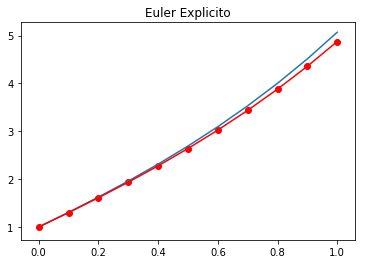

In [24]:
plt.plot(T,exact(T,0,1))
plt.title("Euler Explicito")
plt.plot(T,W[0], c='r')
plt.scatter(T,W[0], c='r')
plt.show()

Ahora apliquemos el metodo de Euler Explicito con pasos $h = 0.1 \times 2^{-k}$ para $k \in \{0,1,\dots, 5\}$ en el intervalo $[0,1]$:

In [10]:
header = ["k", "Paso", "Error Local Maximo", "eoc"]
res = []
globalErrors=[]
steps = []

for k in range(6):
    
    h = 0.1*(2**-k)
    steps.append(h)
    m = int((I[1]-I[0])/h)
    
    T, W = odesolver.solve(f, y0, I, m, method="Explicit Euler")
    
    g = abs(W[0,m]-y1)
    globalErrors.append(g)
    
    maxLocalError = max([abs(W[0,i+1] - exact(T[i+1], T[i], W[0,i])) for i in range(m)])
    
    eoc = "NaN" if k==0 else log(g/prevg)/log(h/prevh)
    res.append([k, h, maxLocalError, eoc])
    
    prevh = h
    prevg = g

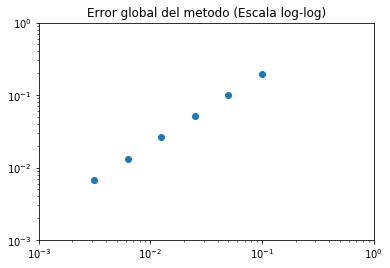

In [25]:
plt.title("Error global del metodo")
plt.scatter(steps, globalErrors)
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-3,1,1e-3,1])
plt.show()

In [12]:
print(ls.latexTable(header, res, '|c|r r r|'))

\begin{tabular}{|c|r r r|} 
 \hline 
k & Paso & Error Local Maximo & eoc \\ \hline 
0 & 0.1 & 0.022668868433444622 & NaN \\ 
1 & 0.05 & 0.005982387299206415 & 0.933587546963545 \\ 
2 & 0.025 & 0.0015384740393056262 & 0.9656406382261543 \\ 
3 & 0.0125 & 0.00039021932959482086 & 0.9825161515419355 \\ 
4 & 0.00625 & 9.827082448321534e-05 & 0.9911799106800493 \\ 
5 & 0.003125 & 2.4658225118656674e-05 & 0.9955701393945221 \\ 
\hline 
 \end{tabular}
